In [30]:
import numpy as np
import scipy as sp
import scipy.integrate
import math
from tedopa import _recurrence_coefficients as rc
import matplotlib.pyplot as plt

In [3]:
def supOhm5(s,omega,x):
    return(np.pi*s/(2*math.factorial(9)*np.power(omega,4))* np.power(x,5)*np.exp(-np.sqrt( np.fabs(x)/omega)))

In [4]:
#Define anti-symmetrized Lorentz
def asl(s,omega,gamma,x):
    return (8*s*gamma*omega*(4*np.power(omega,2)+ np.power(gamma,2))*x)/(
        (4*np.power((x-omega),2)+np.power(gamma,2))*(4*np.power((x+omega),2)+np.power(gamma,2))
    ) 
    #(s* gamma*(np.power(gamma,2)+np.power(omega,2))/np.pi * (1./ (
    #np.power(gamma, 2) + np.power(x - omega, 2)) - 1./ (
    #np.power(gamma, 2) + np.power(x + omega, 2))))

In [8]:
ssO = np.array([35.35,22.15])

In [11]:
ssO[0]

35.35

In [12]:
# Parameters
# The desired degree
degree = 500

omegaC = 1000.

omegaCN = -omegaC

ssO = np.array([35.35,22.15])
ooO = np.array([0.557,1.936])

ssL = np.array([0.0173,0.0246,0.0182])
ooL = np.array([181,221,240])
gammaL = np.array([20,20,20])

temp = 0

In [13]:
if (temp==0):
    omegaCN=0.
    wf = lambda x: 0.5*(supOhm5(ssO[0],ooO[0],x)+supOhm5(ssO[1],ooO[1],x)+asl(ssL[0],ooL[0],gammaL[0],x)
    +asl(ssL[1],ooL[1],gammaL[1],x)+asl(ssL[2],ooL[2],gammaL[2],x)
                 )
else:
    wf = lambda x: 0.5*(0.5 * (1. + 1. / np.tanh(0.5 * x * 1.4387773 / temp)) *
                     supOhm5(ssO[0],ooO[0],x)+supOhm5(ssO[1],ooO[1],x)+asl(ssL[0],ooL[0],gammaL[0],x)
    +asl(ssL[1],ooL[1],gammaL[1],x)+asl(ssL[2],ooL[2],gammaL[2],x)
                     )

In [14]:
jj= wf  
#lambda x: coupling / np.power(np.sign(x), ss - 1) * np.power(x, ss) * np.exp(-1 * np.fabs(x) / cutoff)*0.5*(1.+ 1./np.tanh(0.5*x*1.4387773/temp))

In [16]:
alphas,betas = rc.recurrenceCoefficients(degree,omegaCN,omegaC,jj,1.)

In [17]:
omegas = np.array(alphas)
coups = np.sqrt(betas)
ts = np.sqrt(np.array(betas[1::]))
c0 = np.sqrt(betas[0])

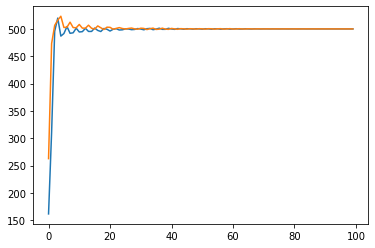

In [24]:
plt.plot(2*coups[0:100])
plt.plot(omegas[0:100])


In [25]:
coups[0]

80.70813909201401

In [35]:
np.sqrt(sp.integrate.quad(jj,0,omegaC)[0]/np.pi)

80.70813909192417

(100.0, 120.0)

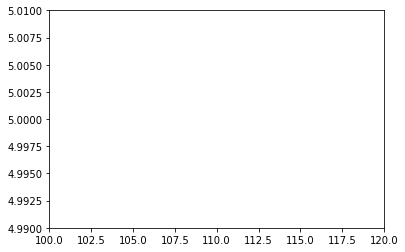

In [20]:
plt.plot(ts)
plt.ylim((4.99,5.01))
plt.xlim((100,120))

In [36]:
np.savetxt("WSCP_MC_T0_freqs.dat",omegas)
np.savetxt("WSCP_MC_T0_coups.dat",coups)